# CS110 Assignment 2 - Multi-tasking Scheduler using Priority Queue

## Q.1
**A. How will you store information about these activities and sub-tasks?**

Overall, I consider each activity as one set of large tasks with determined order of subtasks conducted within the activity. In other words, if we choose to do an activity, we have to do all the subtasks in a pre-decided order and time.

I store information abotu activities by contaiining sub-tasks’ information alongside many other attributes.
Follwoings are 10 pieces of information stored in each activity.
1. ID
2. Description
3. Dependencies
4. Subtasks
5. Tasktype
6. Duration
7. Status
8. Fix Start Time in minutes since 12AM
9. Fix Start Time in four digits
10. Priority 

If I want to retract the activity’s subtasks, I can access therough specifying the index of array containing subtasks’ information.

**B. Describe how your scheduler will work, with an emphasis on why a priority queue is a
well-suited data structure to handle the prioritization of tasks, and how you have defined and
computed the priority value of each task and/or sub-task.**

My scheduler first considers the activities with time constraints; in other words, those whose start time is fixed based on the task inputs. The algorithm extracts all activities with the fixed start time input and stores that activity. From the list, we choose the activity with the earliest scheduled time. 
It then fill up the gap between that earliest scheduled time and the current time based on the priority queue and the list of activities’ relevant dependencies. 
The list of activities’ relevant dependencies are the list containing an activity’s dependencies, and all dependencies of those dependencies. Since we have to make sure that those dependencies are executed before the scheduled activities, we prioritize these activities next to the scheduled tasks.
We then consider the activities within the priority queue. The priority queue consist of group of activities which are ordered from those with the highest priority to those with the lowest; this list follows the maxheap property. 

The priority queue is well-suited to the scheduler for three reasons. First, it maintains the max heap property that makes sure that the activities are ordered from the one with the higher priority level (it can also be a min heap property if a scheduler is aiming to execute by different order). Since we can retract the activity with the highest priority level by using heappop or insert new activity with a priority level by using heappush, we can maintain the maxheap property in the priority queue. Especially, since priority queue is updated almost everytime after an activity is executed and it is removed from other unexecuted activities’ dependency lists, we need a algorithm that creates a priority queue with the quickest and most efficient possible way, which in this case is the heap methods.

Though I admit the priority queue is useful, I differentiate the relevant dependencies list and the priority queue because my definition of priority level is purely based on the type of activities and that there would be a chance that the depended activities may not be executed due to the lower priority value. Besides, the reason why i didn’t include how many times certain activities are listed on the dependency lists as a proxi for the level of priority of an activity is that we need to update the priority every single time an activity is executed and that activity is removed from the dependency list of all other tasks, which may require more computational time and spaces than simply look for the dependencies’ dependencies and execute them one by one. 

Besides, about the priority level, I only compute the activity’s priority because each activity’s subtasks are pre-ordered set of tasks which does not rely on the priority level. I compute the priority value based on my personal preference over different types of activities. I first initialize the priority for all the activities as 0, then reflects my priority criteria of scheduling into the coding. I generally prioritize academics (e.g., assignments, classes, and pre-class readings) over any other schedules. What comes next in my priority preference is a workout (e.g., taking a walk and dancing) and life functioning tasks, all necessary tasks for sending a life, (e.g. laundry, meals, ). Lastly, the activity related to entertainment (e.g., travel, tourism) has the least priority level in my mind.

C. Program an activity scheduler in Python, which receives the list of tasks above as input and
returns a schedule for you to follow. Please refrain from using any external Python library
besides pandas, math, and random modules (if you plan on using other libraries, please check
with your course instructor first).
1
If you want to use our session’s code, feel free to do so provided you properly cite it and highlight all the relevant adjustments.

● Make sure your internal representation of tasks has all the fields described in Figure 1, in
addition to the priority value that will characterize each task. Your activity scheduler must
report at the end of every timestep that a task has been completed. The program ends when all
tasks have been completed.

● Below is an example of what the input and output may look like—this is for illustrative purposes
only, you can improve the formatting and presentation. This example is based on one of our
sessions and you will notice that it doesn’t comply with the requirements that each activity
needs to have 3 sub-tasks, nor do the tasks include their corresponding priority values. This is
something that you are expected to improve on in this assignment.

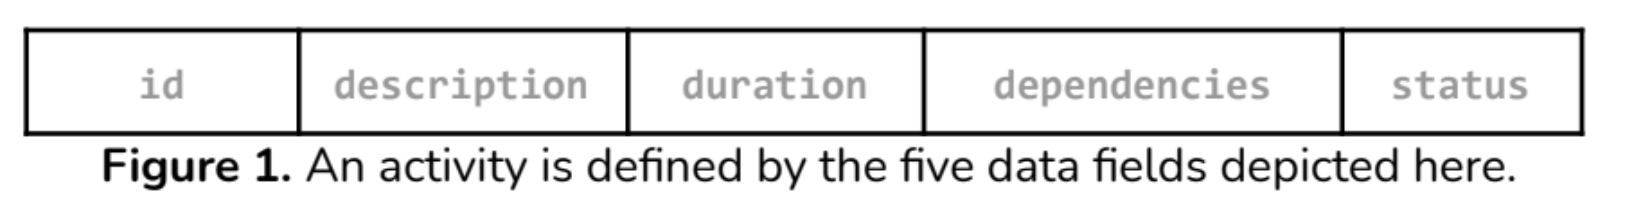

In [1]:
"""
Define a MaxHeapq class to create a max priority queue in scheduler

"""

class MaxHeapq:
    """ 
    A class that implements properties and methods 
    that support a max priority queue data structure

    Attributes
    ----------
    heap : arr
           A Python list where key values in the max heap are stored
    heap_size: int
           An integer counter of the number of keys present in the max heap
    """  
    
    def __init__(self, heap):    
        """
        Initialize the list for heap and heap_size 
        
        Parameters
        ----------
        None
        """
        self.heap       = heap
        self.heap_size  = len(heap)
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """
        return 2 * i + 2

    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """
        return (i - 1)//2

    def maxk(self):     
        """
        Returns the highest key in the priority queue. 
    
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the highest key in the priority queue

        """
        return self.heap[0]     
  
    def heappush(self, key):  
        """
        Inserts a key into a priority queue 
        
        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        # set the last task to the heap
        terminate = Task(-float("inf"), 'a', [], [], '', [], priority = -float("inf"))
        
        # add new leaf to heap
        self.heap.append(terminate)
        
        # update the key with the method defined below
        self.increase_key(self.heap_size,key)
        
        # increase the heap size by 1
        self.heap_size+=1

        
    def increase_key(self, i, key): 
        """
        Updates the value of a key in a max priority queue
        with a higher value
                
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        # compare the new key with the current key
        if key < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        
        # update to new key
        self.heap[i] = key
        
        # modify a list to follow the max-heap property
        while i > 0 and self.heap[self.parent(i)] < self.heap[i]:
            j = self.parent(i)
            # hold the self.heap [j] before swap
            holder = self.heap[j] 
            # swap the value
            self.heap[j] = self.heap[i]
            # transfer the value of holder to the self.heap [i]
            self.heap[i] = holder
            
            # update i with parental node's index to continue heapify
            i = j    
        
       
    def heapify(self, i):
        """
        Creates a max heap from the index given
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapified

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l] > heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)


    def heappop(self):
        """
        Returns the largest key in the max priority queue
        and remove it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        if self.heap_size > 0:
            maxk = self.heap[0]

            # assign the last element as the first element
            self.heap[0] = self.heap[-1]

            # remove the last element from the array
            self.heap.pop()
            self.heap_size-=1

            # apply heapify
            self.heapify(0)
            return maxk

In [5]:
'''
Define a Task class

'''
        

class Task:
    """
    This class defines a Task detail.
    
    Attributes
    ----------
    task_id: int
             Unique task identifier which can be referenced by other tasks  
    
    description: str
              　 Short description of the tasks   
    
    dependencies: arr
                  List of ids indicating whether the current task cannot begin until
                  all of its dependencies have been completed 
              
    subtasks: arr
              List of subtasks and duration of each of them

    task_with_dependencies: arr
                            all dependencies related to the task
                            (including the child level dependencies)
    task_type: str
               Nature of task
               - academic (AC)
               - workout (WO)
               - life functioning (LF)
               - entertainment (EN)
                                
    duration: int
              Duration of task in minutes
              
    status: str
            Current status of the task 
             - 'Not Started' (default)
             - 'In Progress'
             - 'Completed'
             
    fix_start: str
               A fixed activity start time in 12h format (e.g. 18:30 -> 6:30PM)
               if a task is constrained to start at a certain time
              - None (default)
              
    fix_start_digits: str
               A fixed activity start time in four degits of 24h format (e.g. 18:30 -> '1830')
               if a task is constrained to start at a certain time
              - None (default)
              
    priority: int
              Level of a task's priority ranging from 0 to 100
              
    """

    def __init__(self,task_id,description,
                 dependencies,subtasks,task_type, task_with_dependencies, 
                 duration = 0,status = 'Not Started',
                 fix_start = None, fix_start_digits = None,priority = 0):
        """
        Initialize an instance of task
        
        Parameters
        ----------
        None
        """
        self.id = task_id
        self.description = description
        self.dependencies = dependencies
        self.subtasks = subtasks
        
        self.duration = duration
        for sub in range(len(self.subtasks)):
            self.duration += self.subtasks[sub][1]

        self.task_type = task_type
        self.status = status
        
        self.fix_start_digits = fix_start_digits
        self.fix_start = fix_start
            
        # if there is four degits time input
        if self.fix_start_digits != None:

            # convert hourly time into integer
            h = int(self.fix_start_digits[:2])

            # extract minutes from the time input
            m = self.fix_start_digits[2:]

            # 0 - 11AM
            if h < 12:
                self.fix_start =  f"0{h}:{m}AM"
            # 12PM
            elif h == 12:
                self.fix_start =  f"12:{m}PM"
            # 1 - 11PM
            elif h > 21:
                self.fix_start = f"{h-12}:{m}PM"
                
            else:
                self.fix_start =  f"0{h-12}:{m}PM"
                    
        self.priority = priority

        # increase the priority level based on the task nature
        if "AC" in self.task_type:
            # if the activity relates to the academic (AC), 
            # increase the priority level by 60
            self.priority += 60
        elif "WO" in self.task_type:
            # if the activity relates to workout (WO), 
            # increase the priority level by 30
            self.priority += 30
        elif "LF" in self.task_type:
            # if the activity relates to life functioning (LF), 
            # increase the priority level by 40
            self.priority += 40
        elif "EN" in self.task_type:
            # if the activity relates to entertainment (EN), 
            # increase the priority level by 5
            self.priority += 5
            
        self.task_with_dependencies = task_with_dependencies
        
        
            
    def __repr__(self):
        """
        Define how to demonstrate the task details
        
        Parameters
        ----------
        None

        Returns
        ----------
        str
          Explanation of the task details
        """   


        return f"id {self.id}: {self.description}\n\
        \tDuration:{self.duration} minutes\n\
        \tFix Start Time: {self.fix_start}\n\
        \tStatus: {self.status}\n\
        \tTask Type: {self.task_type}\n\
        \tStarts Only After these Tasks (in id): {self.dependencies}\n\
        \tPriority Level:{self.priority}\n\
        \t"

    def __lt__(self, other):
        """
        Compare the magnitude of two tasks' priority level
        
        Parameters
        ----------
        None

        Returns
        ----------
        bool
          True if one priority is smaller than another priority, and False if not.
        """
        return self.priority < other.priority 
    

In [6]:
'''
Define a TaskScheduler class

'''

class TaskScheduler:
    """
    This class defines a daily task scheduler using priority queues.
    
    Attributes
    ----------
    task_id: int
             Unique task identifier which can be referenced by other tasks  
    
    description: str
              　 Short description of the subtasks   
    
    dependencies: arr
                  List of ids indicating whether the current task cannot begin until
                  all of its dependencies have been completed 
    subtasks: arr
              List of subtasks and duration of each of them

    task_with_dependencies: arr
                            all dependencies related to the task
                            (including the child level dependencies)
    task_type: str
               Nature of task
               - academic (AC)
               - workout (WO)
               - life functioning (LF)
               - entertainment (EN)
                                
    duration: int
              Duration of task in minutes
                               
    priority: int
              Level of a task's priority ranging from 0 to 100
              
    status: str
            Current status of the task 
             - 'Not Started' (default)
             - 'In Progress'
             - 'Completed'
             
    fix_start: str
               A fixed activity start time in four degits of 24h format (e.g. 1830 -> 6:30PM)
               if a task is constrained to start at a certain time
              - None (default)
              
    tasks: arr
           list of tasks
           
    priority_queue: arr
                    list of task in the order of priority 
    """
    
    # define three task status
    NOT_STARTED ='Not Started'
    IN_PROGRESS = 'In Progress'
    COMPLETED = 'Completed'
    

    def __init__(self, tasks):
        """
        Initialize the task list, the priority queue, and the sub priority queue
        
        Parameters
        ----------
        None
        """
        self.tasks = tasks
        self.priority_queue = MaxHeapq([])
    
    def print_self(self):
        """
        Define how to print all the tasks
        
        Parameters
        ----------
        None

        Returns
        ----------
        NoneType
          All inputted list of tasks and their details
        """
        # print the title
        print('--- Input List of Tasks ---')
        
        print('Note:\
         \n1. Task Type - academic (AC), workout (WO), life functioning (LF), entertainment (EN))\
         \n2. Fix Start Time - The task should be started at the specific time point.')
        
        # print task information one by one
        for t in self.tasks:
            print()
            print(t)
        
    def remove_dependency(self, task_id):
        """
        Update all the dependencies in the list of tasks
        by removing a task id of a task just completed from the dependency list
        
        Parameters
        ----------
        tasks: arr
               list of tasks
        
        task_id: int
                 task id of a task just completed

        Returns
        ----------
        arr
          list of tasks where task_id removed from the dependency list of other tasks
        """
        # check each task in the task list
        for t in self.tasks:
            
            # if the task_id is still listed as a dependecy of other task
            if t.id != task_id and task_id in t.dependencies:
                # remove the task_id from the dependency list
                t.dependencies.remove(task_id)           
            
    def get_tasks_ready(self):
        """ 
        Extract a list of tasks without task dependencies and fix time 
        and list those tasks in the order of priority key
        
        Parameters
        ----------
        tasks: arr
               list of tasks
               
        Returns
        ----------
        arr
          list of tasks without any pending task dependencies
        """
        
        # check each task in the task list
        for task in self.tasks:
            
            # if task is not yet started (i.e., not in the priority queue)
            # and has no dependencies
            # and does not have fix start time
            if task.status == self.NOT_STARTED and not task.dependencies\
            and task.fix_start_digits == None and task.fix_start == None: 
                # start working on the task and update the task status as "in progress"
                task.status = self.IN_PROGRESS
                
                # insert task into the priority queue using MaxHeapq class defined above
                self.priority_queue.heappush(task)

    def check_unscheduled_tasks(self):
        """
        Check if there is any tasks which are unscheduled 
        (i.e. have never been inserted into the priority queue).
        
        Parameters
        ----------
        tasks: arr
               list of tasks
               
        Returns
        ----------
        bool
          True if at least one task has status = 'Not Started', and false if otherwise.
        """
        # check each task in the task list
        for task in self.tasks:
            # if there is any tasks not yet started
            if task.status == self.NOT_STARTED:
                # return true
                return True
        # if all the tasks are schedules, return false
        return False   
        
    
    def convert_time(self, time):
        """
        Convert time input in four degits into the time in minutes since 12AM

        
        Parameters
        ----------
        time: str
              Four degits Time in 12h format
               
        Returns
        ----------
        int
            time in minutes since 12AM
        """
        # extract minutes from the time input and convert into integer
        h = int(time[:2])
        
        # extract minutes from the time input
        m = int(time[2:])
        
        minutes = 60*h + m
        
        return minutes
                
        
    def find_task_with_dependency(self, t_id, task_with_dependencies = []):
        """
        List up all the tasks with the dependencies related to a task
        in the order of priority
        
        Parameters
        ----------
        t_id: int
              the id of the task of interest
               
        task_with_dependencies: arr
                                list of tasks with the dependencies related to a task
                                default: blank array
               
        Returns
        ----------
        arr
        list of tasks with the dependencies related to a task
        """
        
        t = self.tasks[t_id]
        
        if len(t.dependencies) > 0:  
            # check all the dependency within the task t's dependencies
            for a_id in t.dependencies:

                # append task to the list
                t.task_with_dependencies.append(self.tasks[a_id])
                
                t.task_with_dependencies = list(dict.fromkeys(t.task_with_dependencies))
                
                self.find_task_with_dependency(a_id)

        return t.task_with_dependencies


        
    def format_time(self, time):
        """
        Format inputted time in minutes since 12AM as 12h format
        
        Parameters
        ----------
        time: int
              accumulated time in minutes since 12AM
               
        Returns
        ----------
        str
        12h formatted time
        """

        # calculate hourly time
        h = time//60 
        
        # 0 - 11AM
        if h < 12:
            # the minute part should be written in two digits
            return f"{h}:{time%60:02d}AM"
        # 12PM
        elif h == 12:
            return f"12:{time%60:02d}PM"
        # 1 - 11PM
        else:
            return f"{h-12}:{time%60:02d}PM"
            
    def task_execute(self,current_time,task):
        """
        Execute the specified task by
        printing the scheduled time, task related information, and subtasks
        removing the dependency from other tasks
        and update the current time and task status
        
        Parameters
        ----------
        time: int
              accumulated time in minutes since 12AM
               
        Returns
        ----------
        current_time
            int 
            updated current time
        """
            
        #calculate the end time
        end_time = current_time + task.duration

        #print the task's schedule time
        print(f"⏰{self.format_time(current_time)} - {self.format_time(end_time)}")

        #print the completed task and its duration
        print(f"Task ID {task.id}: {task.description} for {task.duration} mins")
        
        for n in range(len(task.subtasks)):
            print(f"\t - {task.subtasks[n][0]} for {task.subtasks[n][1]} mins")
        print()

        #update the current time after the task completion
        current_time = end_time

        #remove the id of the completed task from the dependency list
        #of other tasks
        self.remove_dependency(task.id)

        #update the task status as completed
        task.status = self.COMPLETED
        
        return current_time
        
    def take_break(self,current_time,break_time):
        """
        Execute the specified task by
        printing the scheduled time, task related information, and subtasks
        removing the dependency from other tasks
        and update the current time and task status
        
        Parameters
        ----------              
        current_time
            int 
            current time in minutes since 12AM
            
        break_time
            int
            time for taking break in minutes since 12AM
               
        Returns
        ----------
        current_time
            int 
            updated current time in minutes since 12AM
        """
        
        end_time = current_time + break_time

        #print the task's schedule time
        print(f"⏰{self.format_time(current_time)} - {self.format_time(end_time)}")

        #print the completed task and its duration
        print(f"🌸🌸 Take a break for {break_time} mins 🌸🌸")

        print()

        #update the current time after the task completion
        current_time = end_time
        
        return current_time
                                    
    
    def run_task_scheduler(self, starting_time = 420):
        """
        Schedule the task given the task list and defined start time
        
        Parameters
        ----------
        starting_time: int
                       start time of the day in minutes since 12AM
               
        Returns
        ----------
        NoneType
          The schedule to complete all tasks
        """
        
        
        # prepare two sets of blank list
        fix_start_timeLIST = []
        fix_start_LIST = []
        
        print("Good Morning! Here is your schedule 📅")
        #initialize the current time as inputted starting_time(7:00AM - 420 mins)
        current_time = starting_time

        # search all tasks within the task list
        for task in self.tasks:
            
            # extract tasks with fix start time
            if task.fix_start_digits is not None:
                
                # convert time of inputted fix start time into minutes since 12AM
                fix_start_time = self.convert_time(task.fix_start_digits)
        
                # append fix start time of tasks with fix start time to a list
                fix_start_timeLIST.append(fix_start_time)
                
                # append tasks with fix start time to a list
                fix_start_LIST.append(task)
                 
        #while there is any unscheduled tasks or there is any tasks on priority queue
        # or anything on the list of tasks with fixed start time
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size > 0\
        or len(fix_start_LIST) > 0 or len(fix_start_timeLIST) > 0:
            
            # create a priority queue
            self.get_tasks_ready()
                        
            # if there is any task in the fixed scheduled task list
            while len(fix_start_LIST) > 0 or len(fix_start_timeLIST) > 0:
                

                # find the earliest fix start time
                earliest_time = min(fix_start_timeLIST)   

                # find the task with the earliest start time
                scheduled_task = fix_start_LIST[fix_start_timeLIST.index(earliest_time)]
                
                # update the scheduled task's dependencies list
                self.find_task_with_dependency(scheduled_task.id)
                
                for i in range(len(scheduled_task.task_with_dependencies)):
                        nowtask = scheduled_task.task_with_dependencies[i]

                        #remove the task from priority queue
                        self.priority_queue.heap.remove(nowtask)
                        self.priority_queue.heap_size -= 1
                
                # calculate the available duration 
                available_duration = earliest_time - current_time
                
                # if the earliest fixed task's start time is before the current time
                if available_duration < 0:
                    raise ValueError("⚠️Change your schedule! There is a schedule conflict!")
                
                # if there is available time for additional task before the fixed schedule
                elif available_duration > 0:
                    
                    # if there is any dependenies found in the fixed task
                    if len(scheduled_task.dependencies) > 0:
                        
                        ava = available_duration
                        
                        #calculate the time required for all tasks related to the fixed task
                        for task_id in scheduled_task.dependencies:
                            ava -= tasks[task_id].duration

                        # raise error if there is no enough time to 
                            # complete all tasks relevant to fixed task
                        if ava < 0:
                            raise 
                            ValueError(f"Wake up earlier by {-ava} mins to complete the task!")

                        else:
                            # if we can manage to do all the task relevant to the scheduled task
                            # complete the task from the last of dependent list
                            
                            while len(scheduled_task.task_with_dependencies) > 0:
                            
                                for i in range(len(scheduled_task.task_with_dependencies),0,-1):
                                    nowtask = scheduled_task.task_with_dependencies[i-1]
                                    available_duration -= nowtask.duration

                                    #execute the task
                                    current_time = self.task_execute(current_time, nowtask)

                                    # remove the item from the tasks' relevant dependencies list
                                    scheduled_task.task_with_dependencies.remove(nowtask)

                    
                    # create a priority queue
                    self.get_tasks_ready()

                    # if no dependency found in the fixed task
                    # and there is any task within the priority queue,
                    # look for task within the priority queue
                    if self.priority_queue.heap_size > 0:
                        
                        # prepare a blank array for storing doabe tasks under available time
                        doable_tasks = MaxHeapq([])
                        
                        #look for the task less than the available time
                        for t in self.priority_queue.heap:

                            # store those tasks in the order of their priority
                            if t.duration <= available_duration:
                                doable_tasks.heappush(t)
                                
                        #if there is any doable tasks
                        while doable_tasks.heap_size >0:
                            
                            # find the doable task with highest priority
                            doable_1sttask = doable_tasks.heap[0]
                            
                            # if the task with the highest priority
                            # can be done within the available time
                            if doable_1sttask.duration <= available_duration:

                                #choose the task with the higest priority
                                #and remove that task from the doable_tasks list
                                nowtask = doable_tasks.heappop()

                                # reduce the available duration

                                available_duration -= nowtask.duration

                                #execute the task
                                current_time = self.task_execute(current_time, nowtask)
                                
                                # remove the task from priority queue
                                # update the heapsize
                                self.priority_queue.heap.remove(nowtask)  
                                self.priority_queue.heap_size -= 1
                                
                                                            
                            # if the task with the highest priority
                            # cannot be done within the available time
                            # delete that from doable tasks list and look for different task
                            else:
                                doable_tasks.heappop()
                                                   
                    if available_duration > 0:
                        # if there is still enough available time
                        # after completeing all tasks meeting time constraints,
                        # take a break
                        current_time = self.take_break(current_time,available_duration)

                # after filling the available time gap, do the scheduled task
                current_time = self.task_execute(earliest_time, scheduled_task)
                
                
                # remove the fix start time of task with fix start time from the list
                del fix_start_timeLIST[fix_start_timeLIST.index(earliest_time)]

                # remove the task with fix start time from the list
                del fix_start_LIST[fix_start_LIST.index(scheduled_task)]
            
            
            while self.priority_queue.heap_size > 0: 
                # if there is no task in the fixed scheduled task list,
                # and there is something left in the priority queue
                # execute the task in the priority queue            
                current_time = self.task_execute(current_time, self.priority_queue.heappop())
    
        #calculate the total time required to finish all the given tasks
        total_time = current_time - starting_time
        
        #print the total time needed to complete all tasks
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")

In [7]:
# Task(self,task_id,description,
#dependencies,subtasks,task_type, duration = 0, status = 'Not Started',
#fix_start = None, priority = 0):


# activities list
tasks = [
    Task(0, 'Watch "Squid Game"', 
         [6],
         [['1. Open my laptop', 5],
          ['2. Sign in the Netflix', 5],
          ['3. Choose the episode', 5],
          ['4. Watch "Squid Game"', 70]
         ],
         'EN',[]),   
    Task(1, 'Visit Cafe for study', 
         [6],
         [['1. Bring my laptop', 5],
          ['2. Search a cafe', 5],
          ['3. Leave the res for the bus stop', 10],
          ['4. Take a bus', 20],
          ['5. Take off bus to visit cafe',10],
          ['6. Order cake and hot chocolate', 5],
          ['7. Study in Cafe', 90]
         ],
         'AC & EN',[],
        fix_start_digits = '1300'), 
    Task(2, 'Join Dance Lesson', 
         [6],
         [['1. Leave the res', 5],
          ['2. Take a train', 15],
          ['3. Change clothes', 5],
          ['4. Participate a dance lesson', 60]
         ],
         'WO & EN',[],
         fix_start_digits = '1800'),
    Task(3,'Visit Namsang Tower', 
         [6],
         [['1. Change shoes', 5],
          ['2. Leave the res for Namsang Tower', 25],
          ['3. Enjoy the view at Namsang Tower', 30],
          ['4. Go back to the res', 20]
         ],
         'WO & EN',[]),     
    Task(4, 'Hanbok Photoshoot',
         [6],
         [['1. Leave the res for the bus stop', 5],
          ['2. Take a bus', 10],
          ['3. Go to Hanbok Rental shop', 20],
          ['4. Change into Hanbok', 20],
          ['5. Walk to Gyeongbokgung', 10],
          ['6. Photoshoot at Gyeongbokgung', 60],
         ],
         'EN',[]), 
     Task(5, 'Laundry', 
         [2],
         [['1. Get ₩3,000 in cash', 10],
          ['2. Gather clothes for laundry', 5],
          ['3. Use laundry machine', 40],
          ['4. Use dryer', 50],
          ['5. Fold Clothes', 10],
          ['6. Put clothes in the drawer', 10]
         ],
         'LF',[]), 
    Task(6, 'Morning Routines', 
         [],
         [['1. Leave my bed', 5],
          ['2. Wash face', 5],
          ['3. Brush teeth', 5],
          ['4. Prepare breakfast', 10],
          ['5. Eat breakfast', 10],
          ['6. Review note from pre-class readings', 5],
          ['7. Do pre-class work', 30],
         ],
         'LF & AC',[]),    
     Task(7, 'Family Phonecall', 
         [6],
         [['1. Find my phone', 5],
          ['2. Send an message to check availability', 5],
          ['3. Start a video call on WeChat', 20]
         ],
         'LF',[]),        
    Task(8, 'Night Routine', 
         [0,1,2,3,4,5,6,7],
         [['1. Brush teeth', 5],
          ['2. Take Shower', 20],
          ['3. Dry hair', 15],
          ['4. Go to bed', 5]
         ],
         'LF',[])]

task_scheduler = TaskScheduler(tasks)
# run the scheduler
task_scheduler.run_task_scheduler()

Good Morning! Here is your schedule 📅
⏰7:00AM - 8:10AM
Task ID 6: Morning Routines for 70 mins
	 - 1. Leave my bed for 5 mins
	 - 2. Wash face for 5 mins
	 - 3. Brush teeth for 5 mins
	 - 4. Prepare breakfast for 10 mins
	 - 5. Eat breakfast for 10 mins
	 - 6. Review note from pre-class readings for 5 mins
	 - 7. Do pre-class work for 30 mins

⏰8:10AM - 8:40AM
Task ID 7: Family Phonecall for 30 mins
	 - 1. Find my phone for 5 mins
	 - 2. Send an message to check availability for 5 mins
	 - 3. Start a video call on WeChat for 20 mins

⏰8:40AM - 10:00AM
Task ID 3: Visit Namsang Tower for 80 mins
	 - 1. Change shoes for 5 mins
	 - 2. Leave the res for Namsang Tower for 25 mins
	 - 3. Enjoy the view at Namsang Tower for 30 mins
	 - 4. Go back to the res for 20 mins

⏰10:00AM - 12:05PM
Task ID 4: Hanbok Photoshoot for 125 mins
	 - 1. Leave the res for the bus stop for 5 mins
	 - 2. Take a bus for 10 mins
	 - 3. Go to Hanbok Rental shop for 20 mins
	 - 4. Change into Hanbok for 20 mins
	 - 5

## Q2

**A. Describe as clearly as you can any changes you will need to make to the first version of the
scheduler to include multi-tasking activities.**

I will add two boolean values to show that if my hands and feet are available for multitasking. As I think in my daily life if my hand is available during a task (e.g., watching movies), I can do something else with my hands (e.g. cleaning my room). I would also add a variable called “singletask” to the MultiTaskScheduler to define a task we look for a task that is a multitaskable task with. Besides, we may add the two versions of the current time to see if the time constraint is met when the multitaskable tasks have a different time duration. For instance, the early current time refers to the time when we complete a task with a shorter duration, while the late current time refers to the time when we complete a task with a longer duration.
For the methods in a class, I mostly reuse the same ones, but I add a couple of methods as explained below.

1) a method to execute the multitasks based on their duration, update the early and lat current time, and execute the “singletask”

2) a method to look for the multitaskable task from a priority queue

3) a method to look for the multitaskable task from a priority queue



**B. Describe how constraints in the scheduling process are handled by a priority queue.
You do not need to provide any code for this question, but you do need to provide clear answers to the questions above.**

Since there are time constraints we perform a different process based on the multitaskability and time duration of multitasked activities. 

If one activity (A) has a shorter duration than the other one (B), the algorithm considers that we multitask both of them for the time of the shorter task (A) ’s duration and complete the remained tasks (B) afterward. Here, after the completion of A, we remove task A from the priority queue, while we have to wait for B’s completion before the removal of B from that queue.
Another important point is that some tasks in the priority queue may not meet the time constraint (e.g., it cannot be completed before the next scheduled task). If so, we have to look for another task in the priority queue with a shorter time duration.

In addition, since each task has different taskability, to reach maximum efficiency we have to look for the different sets of tasks from the queue. As we should not pop the undone task out from the queue, we have to be careful about where to store the potential set of multitaskable tasks apart from the priority queue and compare the time efficiency of task completion.

## Q3
Write an activity priority scheduler with multi-tasking capability in Python, which receives as input a list of tasks and reports (outputs) a schedule for you to follow. As before, please refrain from using any
external Python library besides the math and random module (if you intend on using other libraries,
please check with your course instructor first).
You can follow the example code for the input and output quoted in Q2.

In [10]:
class MultiTask(Task):
    def __init__(self,task_id,description,
                 dependencies,subtasks,task_type, task_with_dependencies, 
                 duration = 0,status = 'Not Started',
                 fix_start = None, fix_start_digits = None,priority = 0, 
                 hand = True, feet = True):
        """
        This class defines a MultiTask detail.

        Attributes
        ----------
        task_id: int
                 Unique task identifier which can be referenced by other tasks  

        description: str
                    Short description of the tasks   

        dependencies: arr
                      List of ids indicating whether the current task cannot begin until
                      all of its dependencies have been completed 

        subtasks: arr
                  List of subtasks and duration of each of them

        task_with_dependencies: arr
                                all dependencies related to the task
                                (including the child level dependencies)
        task_type: str
                   Nature of task
                   - academic (AC)
                   - workout (WO)
                   - life functioning (LF)
                   - entertainment (EN)

        duration: int
                  Duration of task in minutes

        status: str
                Current status of the task 
                 - 'Not Started' (default)
                 - 'In Progress'
                 - 'Completed'

        fix_start: str
                   A fixed activity start time in 12h format (e.g. 18:30 -> 6:30PM)
                   if a task is constrained to start at a certain time
                  - None (default)

        fix_start_digits: str
                   A fixed activity start time in four degits of 24h format (e.g. 18:30 -> '1830')
                   if a task is constrained to start at a certain time
                  - None (default)

        priority: int
                  Level of a task's priority ranging from 0 to 100
                  
        hand: boolean
              If True, it means my hands are open to any tasks.
              
        feet: boolean
              If True, it means my feet are open to any tasks.
              
        """
        
        super().__init__(task_id,description, 
                       dependencies,subtasks,task_type, task_with_dependencies,
                       duration = 0,status = 'Not Started', 
                       fix_start = None, fix_start_digits = None,priority = 0)
        self.id = task_id
        self.description = description
        self.dependencies = dependencies
        self.subtasks = subtasks
        
        self.duration = duration
        for sub in range(len(self.subtasks)):
            self.duration += self.subtasks[sub][1]

        self.task_type = task_type
        self.status = status
        
        self.fix_start_digits = fix_start_digits
        self.fix_start = fix_start
            
        # if there is four degits time input
        if self.fix_start_digits != None:

            # convert hourly time into integer
            h = int(self.fix_start_digits[:2])

            # extract minutes from the time input
            m = self.fix_start_digits[2:]

            # 0 - 11AM
            if h < 12:
                self.fix_start =  f"0{h}:{m}AM"
            # 12PM
            elif h == 12:
                self.fix_start =  f"12:{m}PM"
            # 1 - 11PM
            elif h > 21:
                self.fix_start = f"{h-12}:{m}PM"
                
            else:
                self.fix_start =  f"0{h-12}:{m}PM"
                    
        self.priority = priority
        
        # increase the priority level based on the task nature
        if "AC" in self.task_type:
            # if the activity relates to the academic (AC), 
            # increase the priority level by 60
            self.priority += 60
        elif "WO" in self.task_type:
            # if the activity relates to workout (WO), 
            # increase the priority level by 30
            self.priority += 30
        elif "LF" in self.task_type:
            # if the activity relates to life functioning (LF), 
            # increase the priority level by 40
            self.priority += 40
        elif "EN" in self.task_type:
            # if the activity relates to entertainment (EN), 
            # increase the priority level by 5
            self.priority += 5
            
        self.task_with_dependencies = task_with_dependencies
        self.hand = hand
        self.feet = feet

In [20]:
class MultiTaskScheduler(TaskScheduler): 
    """
    This class defines a daily task scheduler using priority queues.
    
    Attributes
    ----------
    task_id: int
             Unique task identifier which can be referenced by other tasks  
    
    description: str
              　 Short description of the subtasks   
    
    dependencies: arr
                  List of ids indicating whether the current task cannot begin until
                  all of its dependencies have been completed 
    subtasks: arr
              List of subtasks and duration of each of them

    task_with_dependencies: arr
                            all dependencies related to the task
                            (including the child level dependencies)
    task_type: str
               Nature of task
               - academic (AC)
               - workout (WO)
               - life functioning (LF)
               - entertainment (EN)
                                
    duration: int
              Duration of task in minutes
                               
    priority: int
              Level of a task's priority ranging from 0 to 100
              
    status: str
            Current status of the task 
             - 'Not Started' (default)
             - 'In Progress'
             - 'Completed'
             
    fix_start: str
               A fixed activity start time in four degits of 24h format (e.g. 1830 -> 6:30PM)
               if a task is constrained to start at a certain time
              - None (default)

    hand: boolean
          If True, it means my hands are open to any tasks.
              
    feet: boolean
          If True, it means my feet are open to any tasks.
              
    tasks: arr
           list of tasks
           
    priority_queue: arr
                    list of task in the order of priority 

    singletask: arr
                list of task details
                
    """
        
    def __init__(self, tasks):
        """
        Initialize the task list and the priority queue
        
        Parameters
        ----------
        None
        """
        super().__init__(tasks)
        self.priority_queue = MaxHeapq([])
        self.singletask = MultiTask(-float("inf"), '',[], [], '', [])

    def multitask_execute(self,early_current_time,task1,task2):
        """
        Execute the specified two tasks by
        printing the scheduled time, tasks' related information, and subtasks
        removing the dependency from other tasks
        and update the current time and task status
        
        
        Parameters
        ----------
        early_current_time: int
                            current time that is multitaskable in minutes since 12AM
                            
        task1: arr
               the list of task details
        
        task2: arr
               the list of task details
               
        Returns
        ----------
        early_current_time: int
                            current time that is multitaskable in minutes since 12AM
                            
        late_current_time: int
                            current time that is unmultitaskable in minutes since 12AM
                            
        self.singletask: None or arr
                         the task await for the coupled multitask
        """
        
        # if two tasks have the same duration
        if task1.duration == task2.duration:
            #calculate the time after completing the task
            end_time = early_current_time + task1.duration
                    
            #print the task's schedule time
            print(f"⏰{self.format_time(early_current_time)} - {self.format_time(end_time)}")
            print("Multitask")

            for task in [task1,task2]:
                #print the completed task and its relevant information
                print(f"Task ID {task.id}: {task.description} for {task.duration} mins")
                for n in range(len(task.subtasks)):
                    print(f"\t - {task.subtasks[n][0]} for {task.subtasks[n][1]} mins")
                print()
                
            #update the current time
            early_current_time += task1.duration
            late_current_time = early_current_time
            
            #update the task status as completed
            task1.status = self.COMPLETED
            task2.status = self.COMPLETED   
            
            #remove the id of the completed task from the dependency list
            #of other tasks
            self.remove_dependency(task1.id)
            self.remove_dependency(task2.id)
            
            # since there is no task await for multitasking, assign None to self.singletask
            self.singletask = None
            
            
        #if task1 cannot be done before task2's completion
        elif task1.duration > task2.duration:

            #calculate the time after completing the task
            end_time = early_current_time + task2.duration
            
            #print the task's schedule time
            print(f"⏰{self.format_time(early_current_time)} - {self.format_time(end_time)}")
            print("Multitask")

            #print the completed task and its duration
            print(f"Task ID {task2.id}: {task2.description} for {task2.duration} mins")
            for n in range(len(task2.subtasks)):
                print(f"\t - {task2.subtasks[n][0]} for {task2.subtasks[n][1]} mins")
            print()
            
            # update the current time
            late_current_time = early_current_time + task1.duration
            early_current_time += task2.duration
            
            #check which subtasks of task 1 can be completed
            ava_time = int(task2.duration)               
            subtasklist = []
            task_duration = 0

            while ava_time - task1.subtasks[0][1] > 0 and task1.subtasks is not []:
                #update the duration
                task_duration += task1.subtasks[0][1]
                ava_time -= task1.subtasks[0][1]
                
                #add the executed task
                subtasklist.append(task1.subtasks[0])
                
                #remove the executed task from task1
                task1.subtasks.remove(task1.subtasks[0])
            
            #print the in_progress task and its duration
            print(f"Task ID {task1.id}: {task1.description} for {task1.duration} mins")
            for n in range(len(subtasklist)):
                print(f"\t - {subtasklist[n][0]} for {subtasklist[n][1]} mins")
                task1.duration -= subtasklist[n][1]
            print()            
            
            #update the task status
            task1.status = self.IN_PROGRESS
            task2.status = self.COMPLETED
            
            #remove the id of the completed task from the dependency list
            #of other tasks
            self.remove_dependency(task2.id)

            #assign task1 as a task for looking for multitask
            self.singletask = task1
                        
        #if task2 cannot be done before task1's completion
        else:
            #calculate the time after completing the task
            end_time = early_current_time + task1.duration
                
            #print the task's schedule time
            print(f"⏰{self.format_time(early_current_time)} - {self.format_time(end_time)}")
            print("Multitask")

            #print the completed task and its duration
            print(f"Task ID {task1.id}: {task1.description} for {task1.duration} mins")
            for n in range(len(task1.subtasks)):
                print(f"\t - {task1.subtasks[n][0]} for {task1.subtasks[n][1]} mins")
            print()
            
            
            # update the current time
            late_current_time = early_current_time + task2.duration
            early_current_time += task1.duration
            
            
            #check which subtasks of task 2 can be completed
            ava_time = int(task1.duration)               
            subtasklist = []
            task_duration = 0

            while ava_time - task2.subtasks[0][1] > 0 and task2.subtasks is not []:
                #update the duration
                task_duration += task2.subtasks[0][1]
                ava_time -= task2.subtasks[0][1]
                
                #add the executed task
                subtasklist.append(task2.subtasks[0])
                
                #remove the executed task from task1
                task2.subtasks.remove(task2.subtasks[0])
                
            
            #print the in_progress task and its duration
            print(f"Task ID {task2.id}: {task2.description} for {task_duration} mins")
            for n in range(len(subtasklist)):
                print(f"\t - {subtasklist[n][0]} for {subtasklist[n][1]} mins")
                task2.duration -= subtasklist[n][1]
            print()            
            

            #update the task status
            task1.status = self.COMPLETED
            task2.status = self.IN_PROGRESS
            
            #remove the id of the completed task from the dependency list
            #of other tasks
            self.remove_dependency(task1.id)
            
            #assign task2 as a task for looking for multitask
            self.singletask = task2

        return early_current_time, late_current_time, self.singletask

        
    def dep_execute(self,dependency_list, task1, early_current_time, late_current_time,
                    check_found = False, singletask = None):  
        """
        Find a multitaskable task from the list of relevant dependencies 
        and execute the task(s).
        
        Parameters
        ----------
        dependency_list: arr
                         the list of relevant dependencies of a task
                            
        task1: arr
               the list of task details
        
        early_current_time: int
                            current time that is multitaskable in minutes since 12AM
                            
        late_current_time: int
                            current time that is unmultitaskable in minutes since 12AM
        
        check_found: boolean
                     the status whether we found any tasks multitaskable with task 1
                     
        singletask: None (default) or arr
                         the details about the task await for the coupled multitask
        
        Returns
        ----------
        early_current_time: int
                            current time that is multitaskable in minutes since 12AM
                            
        late_current_time: int
                            current time that is unmultitaskable in minutes since 12AM
                            
        self.singletask: None or arr
                         the task await for the coupled multitask
        """
        
        # if task1 is multitaskable
        if task1.hand == True or task1.feet == True:
            
            # create a temporary list to find multitaskable task with task1
            temp_list = []
            for task in dependency_list:
                temp_list.append(task)
            
            # while we haven't found the multitaskable task and the temporary list has
            # any elements
            while len(temp_list) > 0 and check_found == False:
                task2 = temp_list.pop()

                # if TWO tasks are multitask-able
                if (task1.hand + task2.hand == 1 or 2) and (task1.feet + task2.feet == 1 or 2):
                    
                    # execute task 1 and task 2
                    early_current_time, late_current_time, self.singletask =\
                    self.multitask_execute(early_current_time,task1,task2)
                    
                    # remove task2 from the list
                    dependency_list.remove(task2)
                        
                    #if you find any multitask in the dependency list
                    #leave the while loop
                    check_found = True   
                    
        # if there is no task in the dependency list that task 1 can work with
        # or if the task1 is not multitaskable,
        # just execute the task
        # start new task from new time!
        else:
            early_current_time = self.task_execute(early_current_time, task1)
            late_current_time = early_current_time
            self.singletask = None

        return early_current_time, late_current_time, self.singletask
        

    def pq_execute(self, task1, early_current_time, late_current_time, 
                   earliest = float("inf"), check_found = False, singletask = None):
        
        """
        Find a multitaskable task from the priority queue
        and execute the task(s).
        
        Parameters
        ----------                            
        task1: arr
               the list of task details
        
        early_current_time: int
                            current time that is multitaskable in minutes since 12AM
                            
        late_current_time: int
                            current time that is unmultitaskable in minutes since 12AM
        
        check_found: boolean
                     the status whether we found any tasks multitaskable with task 1
                     
        singletask: None (default) or arr
                         the details about the task await for the coupled multitask
        
        Returns
        ----------
        early_current_time: int
                            current time that is multitaskable in minutes since 12AM
                            
        late_current_time: int
                            current time that is unmultitaskable in minutes since 12AM
                            
        self.singletask: None or arr
                         the task await for the coupled multitask
        """
        
        #check if task1 is multitaskable
        if task1.hand == True or task1.feet == True:
            temp_queue = MaxHeapq([])
            for task in self.priority_queue.heap:
                temp_queue.heappush(task)
            
            while temp_queue.heap_size > 0 and check_found == False:
                task2 = temp_queue.heappop()
                
                # if task 2 takes less than the time constraint
                if task2.duration <= earliest - early_current_time:
                    
                    # if TWO tasks are multitask-able
                    if (task1.hand + task2.hand == 1 or 2) and\
                    (task1.feet + task2.feet == 1 or 2):
                        
                        # execute multitasks
                        early_current_time, late_current_time, self.singletask =\
                        self.multitask_execute(early_current_time,task1,task2)

                        # remove task2 from the list
                        self.priority_queue.heap.remove(task2)
                        self.priority_queue.heap_size -= 1

                        #if you find any multitask in the dependency list
                        #leave the while loop
                        check_found = True

        # if there is no task in the priority queue that task 1 can work with
        # or if the task1 is not multitaskable,
        # just execute the task
        # start new task from new time!            
        else:
            early_current_time = self.task_execute(early_current_time, task1)
            late_current_time = early_current_time
            self.singletask = None

        return early_current_time, late_current_time, self.singletask
                            
    
    def run_multitask_scheduler(self, starting_time = 420):
        """
        Schedule the task given the task list and defined start time
        
        Parameters
        ----------
        starting_time: int
                       start time of the day in minutes since 12AM
               
        Returns
        ----------
        NoneType
          The schedule to complete all tasks
        """

        # prepare two sets of blank list
        fix_start_timeLIST = []
        fix_start_LIST = []
        
        print("Good Morning! Here is your schedule 📅")
        #initialize the current time as inputted starting_time(7:00AM - 420 mins)
        #early_current_time refers to the time completing the shorter task in multitasking
        early_current_time = starting_time
        
        #early_current_time refers to the time completing the longer task in multitasking
        late_current_time = starting_time

        # search all tasks within the task list
        for task in self.tasks:
            
            # extract tasks with fix start time
            if task.fix_start_digits is not None:
                
                # convert time of inputted fix start time into minutes since 12AM
                fix_start_time = self.convert_time(task.fix_start_digits)
        
                # append fix start time of tasks with fix start time to a list
                fix_start_timeLIST.append(fix_start_time)
                
                # append tasks with fix start time to a list
                fix_start_LIST.append(task)

        #while there is any unscheduled tasks or there is any tasks on priority queue
        # or anything on the list of tasks with fixed start time
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size > 0\
        or len(fix_start_LIST) > 0 or len(fix_start_timeLIST) > 0:
            
            # create a priority queue
            self.get_tasks_ready()
             
            # if there is any task in the fixed scheduled task list
            while len(fix_start_LIST) > 0 or len(fix_start_timeLIST) > 0:
                
                # create a priority queue
                self.get_tasks_ready()

                # find the earliest fix start time
                earliest_fix_time = min(fix_start_timeLIST)   
                
                # find the task with the earliest start time
                scheduled_task = fix_start_LIST[fix_start_timeLIST.index(earliest_fix_time)]
                
                # update the scheduled task's dependencies list
                self.find_task_with_dependency(scheduled_task.id)
                
                # remove scheduled task's all dependencies from priority queue
                for task in scheduled_task.task_with_dependencies:
                    self.priority_queue.heap.remove(task)
                    self.priority_queue.heap_size -= 1

                # if the earliest fixed task's start time is before the current time
                if earliest_fix_time < late_current_time:
                    raise ValueError("⚠️Change your schedule! There is a schedule conflict!")
                
                # if there is available time for additional task before the fixed schedule
                while earliest_fix_time > late_current_time:
                    
                    # if there're any unexecuted tasks relevant to scheduled task
                    while len(scheduled_task.task_with_dependencies) > 0:
                        
                        #if the last executed task is already multitasked with other tasks,
                        #that task is unmultitaskable one,
                        #or it is the first task to schedule in the scheduler
                        if late_current_time == early_current_time: 
                            task1 = scheduled_task.task_with_dependencies.pop()
                            early_current_time, late_current_time, singletask =\
                            self.dep_execute(scheduled_task.task_with_dependencies,task1,
                                             early_current_time, late_current_time)

                        #if the last executed task is not yet multitasked with other tasks
                        #(i.e., late_current_time > early_current_time)
                        else:
                            early_current_time, late_current_time, singletask =\
                            self.dep_execute(scheduled_task.task_with_dependencies, 
                                             singletask, early_current_time, 
                                             late_current_time)               
                                    
                    self.get_tasks_ready()  
                    
                    if earliest_fix_time > late_current_time:
                    #if you schedule all the relevant dependencies of the scheduled task
                    #and still have time for new task
                    #and there is some task remaining in the priority queue
                        if self.priority_queue.heap_size > 0:
                            temp_queue1 = MaxHeapq([])
                            for task in self.priority_queue.heap:
                                temp_queue1.heappush(task)
                            
                            while temp_queue1.heap_size > 0:
                                if late_current_time == early_current_time:
                                    while temp_queue1.heap_size > 0:
                                        task1 = temp_queue1.heappop()

                                        if task1.duration <=\
                                        earliest_fix_time - early_current_time:
                                            self.priority_queue.heappop()
                                            early_current_time, late_current_time,\
                                            self.singletask =\
                                            self.pq_execute(task1,early_current_time, 
                                                            late_current_time, 
                                                            earliest = earliest_fix_time)
                                            
                                            # remove the executed task from the temporary heap
                                            if self.singletask in temp_queue1.heap:
                                                temp_queue1.heap.remove(self.singletask)
                                                temp_queue1.heap_size -= 1
                                                
                                            if self.singletask is not None:
                                                break

                                else:
                                    early_current_time, late_current_time, self.singletask =\
                                    self.pq_execute(self.singletask, early_current_time,
                                                    late_current_time, 
                                                    earliest = earliest_fix_time)
                                    
                                    if self.singletask in temp_queue1.heap:
                                        temp_queue1.heap.remove(self.singletask)
                                        temp_queue1.heap_size -= 1
               
                    # if there is still enough available time
                    # after completeing all tasks meeting time constraints,
                    # take a break
                    if earliest_fix_time > late_current_time:
                        
                        late_current_time =\
                        self.take_break(late_current_time,earliest_fix_time-late_current_time)
                        
                        #update time
                        early_current_time = late_current_time
                
                #execute scheduled task
                #if scheduled task is multitaskable
                if scheduled_task.hand == True or scheduled_task.feet == True:
                    self.singletask = scheduled_task
                    
                #if scheduled task is non-multitaskable
                else:
                    early_current_time = self.task_execute(earliest_fix_time, scheduled_task)
                    late_current_time = early_current_time
                    self.singletask = None
            
                # remove the fix start time of task with fix start time from the list
                del fix_start_timeLIST[fix_start_timeLIST.index(earliest_fix_time)]

                # remove the task with fix start time from the list
                del fix_start_LIST[fix_start_LIST.index(scheduled_task)]
            
            self.get_tasks_ready()
            
            while self.priority_queue.heap_size > 0: 
                # if there is no task in the fixed scheduled task list,
                # and there is something left in the priority queue
                # execute the task in the priority queue   
                
                if late_current_time == early_current_time:     
                    task1 = self.priority_queue.heappop()
                    
                    # if there're any other tak in thep priority queue
                    if self.priority_queue.heap_size > 0:
                        early_current_time, late_current_time, self.singletask =\
                        self.pq_execute(task1,early_current_time, late_current_time)  
                    
                    #it task1 is only task in the priority queue
                    else:
                        early_current_time = self.task_execute(early_current_time, task1)
                        late_current_time = early_current_time

                #if the last executed task is not yet multitasked with other tasks
                #(i.e., late_current_time > early_current_time)
                else:
                    early_current_time, late_current_time, self.singletask =\
                    self.pq_execute(self.singletask, early_current_time, late_current_time)  

                self.get_tasks_ready()
                
            # if there is unexecuted multitaskable task
            if singletask:
                early_current_time = self.task_execute(early_current_time, self.singletask)
                late_current_time = early_current_time
                self.singletask = None
                
        #calculate the total time required to finish all the given tasks
        total_time = late_current_time - starting_time
        
        #print the total time needed to complete all tasks
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")

In [21]:
# define the activities list
multitasks = [
    MultiTask(0, 'Watch "Squid Game"', 
         [6],
         [['1. Open my laptop', 5],
          ['2. Sign in the Netflix', 5],
          ['3. Choose the episode', 5],
          ['4. Watch "Squid Game"', 60]
         ],
         'EN',[]),   
    MultiTask(1, 'Visit Cafe for study', 
         [6],
         [['1. Bring my laptop', 5],
          ['2. Search a cafe', 5],
          ['3. Leave the res for the bus stop', 10],
          ['4. Take a bus', 20],
          ['5. Take off bus to visit cafe',10],
          ['6. Order cake and hot chocolate', 5],
          ['7. Study in Cafe', 90]
         ],
         'AC & EN', [], 
         fix_start_digits = '1300', hand = False, feet = False), 
    MultiTask(2, 'Join Dance Lesson', 
         [6],
         [['1. Leave the res', 5],
          ['2. Take a train', 15],
          ['3. Change clothes', 5],
          ['4. Participate a dance lesson', 60]
         ],
         'WO & EN',[],
         fix_start_digits = '1800', hand  = False, feet  = False),
    MultiTask(3,'Visit Namsang Tower', 
         [6],
         [['1. Change shoes', 5],
          ['2. Leave the res for Namsang Tower', 25],
          ['3. Enjoy the view at Namsang Tower', 30],
          ['4. Go back to the res', 20]
         ],
         'WO & EN', [], feet = False),     
    MultiTask(4, 'Hanbok Photoshoot',
         [6],
         [['1. Leave the res for the bus stop', 5],
          ['2. Take a bus', 10],
          ['3. Go to Hanbok Rental shop', 20],
          ['4. Change into Hanbok', 20],
          ['5. Walk to Gyeongbokgung', 10],
          ['6. Photoshoot at Gyeongbokgung', 60],
         ],
         'AC & EN',[1], hand = False, feet = False), 
     MultiTask(5, 'Laundry', 
         [2],
         [['1. Get ₩3,000 in cash', 10],
          ['2. Gather clothes for laundry', 5],
          ['3. Use laundry machine', 40],
          ['4. Use dryer', 50],
          ['5. Fold Clothes', 10],
          ['6. Put clothes in the drawer', 10]
         ],
         'LF',[]), 
    MultiTask(6, 'Morning Routines', 
         [],
         [['1. Leave my bed', 5],
          ['2. Wash face', 5],
          ['3. Brush teeth', 5],
          ['4. Prepare breakfast', 10],
          ['5. Eat breakfast', 10],
          ['6. Review note from pre-class readings', 5],
          ['7. Do pre-class work', 30],
         ],
         'LF & AC', [],hand = False, feet = False),    
     MultiTask(7, 'Family Phonecall', 
         [6],
         [['1. Find my phone', 5],
          ['2. Send an message to check availability', 5],
          ['3. Start a video call on WeChat', 20]
         ],
         'LF',[]),        
    MultiTask(8, 'Night Routine', 
         [0,1,2,3,4,5,6,7],
         [['1. Brush teeth', 5],
          ['2. Take Shower', 20],
          ['3. Dry hair', 15],
          ['4. Go to bed', 5]
         ],
         'LF', [], hand = False, feet = False)]

multitask_scheduler = MultiTaskScheduler(multitasks)

# run the scheduler
multitask_scheduler.run_multitask_scheduler()

Good Morning! Here is your schedule 📅
⏰7:00AM - 8:10AM
Task ID 6: Morning Routines for 70 mins
	 - 1. Leave my bed for 5 mins
	 - 2. Wash face for 5 mins
	 - 3. Brush teeth for 5 mins
	 - 4. Prepare breakfast for 10 mins
	 - 5. Eat breakfast for 10 mins
	 - 6. Review note from pre-class readings for 5 mins
	 - 7. Do pre-class work for 30 mins

⏰8:10AM - 10:15AM
Task ID 4: Hanbok Photoshoot for 125 mins
	 - 1. Leave the res for the bus stop for 5 mins
	 - 2. Take a bus for 10 mins
	 - 3. Go to Hanbok Rental shop for 20 mins
	 - 4. Change into Hanbok for 20 mins
	 - 5. Walk to Gyeongbokgung for 10 mins
	 - 6. Photoshoot at Gyeongbokgung for 60 mins

⏰10:15AM - 10:45AM
Multitask
Task ID 7: Family Phonecall for 30 mins
	 - 1. Find my phone for 5 mins
	 - 2. Send an message to check availability for 5 mins
	 - 3. Start a video call on WeChat for 20 mins

Task ID 3: Visit Namsang Tower for 5 mins
	 - 1. Change shoes for 5 mins

⏰10:45AM - 12:00PM
Multitask
Task ID 3: Visit Namsang Tower for 